<a href="https://colab.research.google.com/github/JenniferZeng11/world-covid-vaccinations/blob/main/worldcovidvaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

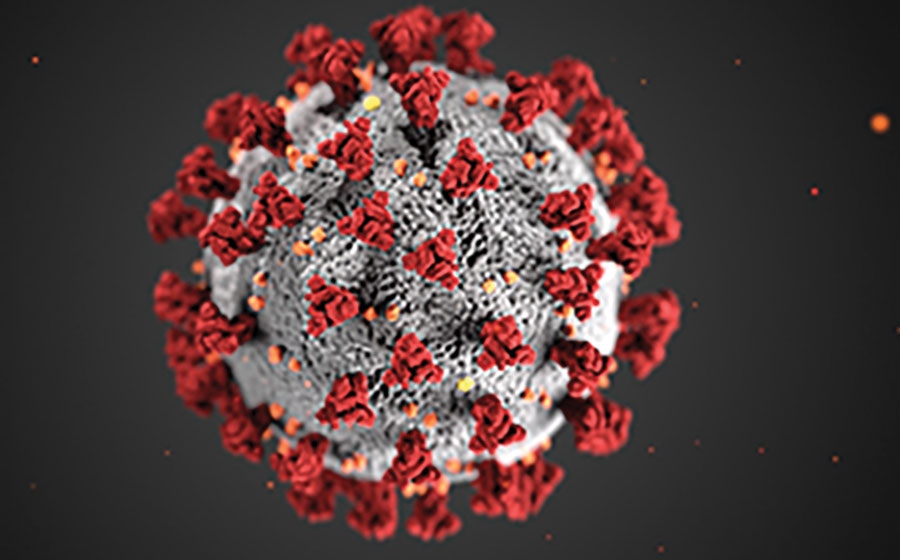
Picture retrieved from CDC (https://wwwnc.cdc.gov/eid/article/26/5/et-2605-f1) <br><br>
**About the data** 🦠<br>
The current exploration utilized the COVID-19 World Vaccination Progress data from Kaggle, with version 114 updated by May 6. Data include the number of people vaccinated, the total number of people vaccinated, the number of people fully vaccinated, number of people who get vaccinated daily. <br><br>

**Why I picked the dataset** 💉<br>
Covid-19 hit the entire planet in December 2019; since then, our lives have been changed. To fight against the Covid-19 pandemic, researchers and scientists tried their best to develop vaccinations in a short period. People started to get vaccinated in December 2020, hoping to get back to normal life, such as gathering or in-person school life. With an interest in exploring the global covid vaccination population, I would utilize the skills we learned in this class (pandas, Plotly, and Tableau) to better understand the current vaccination status. Questions to be investigated include which country has the most vaccinations up to date, which country with the most people vaccinated daily?<br>


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 262kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go


import plotly.io as pio

# First Peak of Our Covid-19 Vaccination Dataset 🧑‍🔬


Loading the dataset --

In [3]:
df = pd.read_csv('https://github.com/JenniferZeng11/world-covid-vaccinations/blob/main/country_vaccinations.csv?raw=true')

With df.shape(), we know that the dataset contains 15505 rows and 15 columns.

In [4]:
df.shape

(15505, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15505 entries, 0 to 15504
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15505 non-null  object 
 1   iso_code                             15505 non-null  object 
 2   date                                 15505 non-null  object 
 3   total_vaccinations                   9325 non-null   float64
 4   people_vaccinated                    8649 non-null   float64
 5   people_fully_vaccinated              6425 non-null   float64
 6   daily_vaccinations_raw               7830 non-null   float64
 7   daily_vaccinations                   15307 non-null  float64
 8   total_vaccinations_per_hundred       9325 non-null   float64
 9   people_vaccinated_per_hundred        8649 non-null   float64
 10  people_fully_vaccinated_per_hundred  6425 non-null   float64
 11  daily_vaccinations_per_milli

Look into first and last couple of rows with df.head() and df.tail()

In [6]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [7]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15500,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15501,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15502,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15503,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15504,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


Viewing randomly sample 10 rows using df.sample(10). 

In [8]:
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [9]:
df['date'].min()

'2020-12-14'

In [10]:
df['date'].max()

'2021-05-05'

In [11]:
country = []
for i in df['country']:
    if i not in country:
        country.append(i)
len(country)

195

From viewing the sample data, I found out that the data was organized by country, with the earliest data from 2020 December 14 to the latest data on May 5, 2021. The dataset includes information from 195 countries. In addition to the number of daily vaccination, fully vaccination, total vaccination, information of date, vaccine type, website source were also provided.

# Data Cleaning 🧹

In [12]:
df_cleaned = df.dropna(axis=0,how='any')
df_cleaned = df_cleaned.reset_index(drop = True)
df_cleaned

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://twitter.com/gmanastirliu/status/138999...
1,Andorra,AND,2021-04-05,15269.0,9781.0,4484.0,2829.0,573.0,19.76,12.66,5.80,7416.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
2,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5711,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5712,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5713,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


In [13]:
df_cleaned['date'].min()

'2020-12-28'

In [14]:
df_cleaned['date'].max()

'2021-05-05'

In [15]:
country_cleaned = []
for i in df_cleaned['country']:
    if i not in country_cleaned:
        country_cleaned.append(i)
len(country_cleaned)

105

Remove data with NaN values and stored in df_cleaned data frame; now remaining data has 5715 rows, the same 15 columns; data range from December 28, 2020, to May 5, 2021, with a total of 105 countries.

# Total Vaccinations by country 🌎

Total vaccinations number refer to the absolute number of total immunizations in the country. What is the current vaccination status around the world? Which country has the most significant total vaccination number, and which country has the least total vaccination population?

**Total Vaccinations by country Table**

Group the dataset by country to found out the total vaccination. 

In [16]:
df_country_total_va = df.groupby('country')['total_vaccinations'].max()
df_country_total_va = df_country_total_va.reset_index()
df_country_total_va

,country,total_vaccinations
0,Afghanistan,240000.0
1,Albania,556584.0
2,Algeria,75000.0
3,Andorra,28881.0
4,Angola,456349.0
...,...,...
190,Venezuela,250000.0
191,Vietnam,585539.0
192,Wales,2656272.0
193,Zambia,58982.0


**Total Vaccinations by Countries Histogram**

In [17]:
fig = px.histogram(df_country_total_va,
             x='total_vaccinations',
             title='Total Vaccinations by Countries')
fig.show()

The above "Total Vaccinations by Countries" vertical histogram show the total vaccination distribution. Most of the countries (88 counts) were in the range of 0 to 9.9 million population for total vaccinations. The top three countries were in the range of 240 to 250 million, 150 to 160 million, and 50 to 60 million.

**Total Vaccinations by Top 10 Countries**

Table below showed the top 10 country with the most total vaccinations number.

In [18]:
df_country_total_va.nlargest(10, ['total_vaccinations'])

,country,total_vaccinations
34,China,289627000.0
187,United States,249566820.0
78,India,159931238.0
186,United Kingdom,50682567.0
25,Brazil,45671672.0
51,England,42408492.0
64,Germany,32596999.0
181,Turkey,24103883.0
60,France,23404537.0
85,Italy,22112154.0


To visualize the table, below bar chart is created.

In [19]:
fig = px.bar(
    df_country_total_va.nlargest(10, ['total_vaccinations']),
    x='total_vaccinations',
    y='country',
    color = 'country',
    title='Total Vaccinations by Top 10 Countries',
    height=600
)

fig.update_yaxes(categoryorder='total ascending')

fig.show()

The chart above "Total Vaccinations by Top 10 Countries" showed the top 10 countries' total vaccination numbers, with the highest range from 200 to 290 million people. The table also indicated that China (289627000 people) was the country with the most vaccinations, followed by United States (249566820 people).

**Total Vaccinations by Bottom 10 Countries**

Below table described the bottom 10 countries for total vaccinations.

In [20]:
df_country_total_va.nsmallest(10, ['total_vaccinations'])

,country,total_vaccinations
29,Cameroon,400.0
8,Armenia,565.0
121,Nauru,700.0
99,Libya,750.0
166,South Sudan,947.0
126,Niger,1366.0
43,Democratic Republic of Congo,1700.0
116,Montserrat,1909.0
31,Cape Verde,2184.0
173,Syria,2500.0


In [21]:
fig = px.bar(
    df_country_total_va.nsmallest(10, ['total_vaccinations']),
    x='total_vaccinations',
    y='country',
    color = 'country',
    title='Total Vaccinations by Bottom 10 Countries',
    height=600
)

fig.update_yaxes(categoryorder='total descending')

fig.show()

The chart above, "Total Vaccinations by Bottom 10 Countries' showed the bottom ten countries" total vaccination numbers, with the lowest in the range from 0 to 990 people. The number pointed out that Cameroon was the country with the lowest total vaccination rate with 400 people.

# Fully Vaccinations by Country 💉

Indicated by the original data, fully vaccination value is the number of people who received the entire set of immunization according to the immunization scheme (typically 2); it may contain people who received one vaccine. The world fully vaccination profile would be explored in this section. 

**Fully Vaccinations by Country Table**

To explore the fully vaccination data around the world, I group the data with country and clean the NaN data only in the "people_fully_vaccinated" column.

In [22]:
df_country_fully_va = df.groupby('country')['people_fully_vaccinated'].max()
df_country_fully_va = df_country_fully_va.reset_index()
df_country_fully_va

,country,people_fully_vaccinated
0,Afghanistan,NaN
1,Albania,655.0
2,Algeria,NaN
3,Andorra,4699.0
4,Angola,NaN
...,...,...
190,Venezuela,NaN
191,Vietnam,NaN
192,Wales,783120.0
193,Zambia,NaN


**cleaning data: drop the rows with NaN data**

In [23]:
df_country_fully_va  = df_country_fully_va .dropna(axis=0,how='any')
df_country_fully_va = df_country_fully_va .reset_index(drop = True)
df_country_fully_va 

,country,people_fully_vaccinated
0,Albania,655.0
1,Andorra,4699.0
2,Anguilla,783.0
3,Argentina,1130337.0
4,Aruba,23824.0
...,...,...
124,United Kingdom,15887493.0
125,United States,107346533.0
126,Uruguay,733467.0
127,Wales,783120.0


**Fully Vaccinations by Countries Boxplot**

In [24]:
fig = px.box(df_country_fully_va,
             x='people_fully_vaccinated',
             orientation='h',
             title='Fully Vaccinations by Country')
fig.show()

The "Fully Vaccinations by Country" boxplot indicated that the maximum of fully vaccinations was 107.35 million, the median was 228.37 thousand, and a minimum of 82. The below boxplot removed the outliers for a better view.

In [25]:
#(excluding outliers for better view)
fig = px.box(df_country_fully_va,
             x='people_fully_vaccinated',
             orientation='h',
             points=False,
             title='Fully Vaccinations by Countries (without outliers)')
fig.show()

# Maximun Daily Vaccinations by Country Comparison 📅

Daily vaccination is the number of vaccination for a specific date in a country. This section will dig into the daily vaccinations data and find out the country with the most daily vaccinations, both in numbers and through visualizations (heatmap and treemap).

**Maximun Daily Vaccinations by Country Table**

In [26]:
df_country_daily_va = df.groupby('country')['daily_vaccinations'].max()
df_country_daily_va = df_country_daily_va.reset_index()
df_country_daily_va

,country,daily_vaccinations
0,Afghanistan,8000.0
1,Albania,17565.0
2,Algeria,3748.0
3,Andorra,1182.0
4,Angola,18751.0
...,...,...
190,Venezuela,15200.0
191,Vietnam,53975.0
192,Wales,33151.0
193,Zambia,5295.0


**cleaning data: drop the rows with NaN data**

In [27]:
df_country_daily_va  = df_country_daily_va .dropna(axis=0,how='any')
df_country_daily_va = df_country_daily_va .reset_index(drop = True)
df_country_daily_va

,country,daily_vaccinations
0,Afghanistan,8000.0
1,Albania,17565.0
2,Algeria,3748.0
3,Andorra,1182.0
4,Angola,18751.0
...,...,...
184,Venezuela,15200.0
185,Vietnam,53975.0
186,Wales,33151.0
187,Zambia,5295.0


In [28]:
fig = px.density_heatmap(
    df_country_daily_va,
    x = 'daily_vaccinations',
    y = 'country',
    title = 'daily vaccinations heatmap',
    height = 600
)

fig.show()

The heatmap showed that most of the country is in the range of 0 to 490 thousand daily vaccinations.

**Top 10 Country of Daily Vaccinations**


In [29]:
df_country_daily_va.nlargest(10, ['daily_vaccinations'])

,country,daily_vaccinations
33,China,7205286.0
75,India,3659357.0
181,United States,3384387.0
24,Brazil,1135847.0
61,Germany,672360.0
180,United Kingdom,602266.0
48,England,507875.0
76,Indonesia,449308.0
82,Italy,447864.0
175,Turkey,435596.0


In [30]:
fig = px.treemap(
    df_country_daily_va.nlargest(10, ['daily_vaccinations']),
    path=['country'],
    title='Top 10 Daily vaccinations',
    values='daily_vaccinations',
    height=700
)

fig.show()

Both the table and treemap reveal that China has the most daily vaccinations (7205286), followed by India (3659357). The United States ranked third with a daily population of 3384387.

# Most up to date data 🗓️

Which date has the most updated data? What happened on that day? Which country has the most fully vaccinated population, and what vaccines are deployed around the world? 

**Checking the most recent date of the data**

In [31]:
df['date'].max()

'2021-05-05'

**Daily Vaccinations United States on May 5th**

In [32]:
df_may_5 = df[df['date'] == '2021-05-05']
df_may_5

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
175,Albania,ALB,2021-05-05,556584.0,NaN,NaN,19197.0,17565.0,19.34,NaN,NaN,6104.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://twitter.com/gmanastirliu/status/138999...
622,Argentina,ARG,2021-05-05,8391513.0,7261176.0,1130337.0,194502.0,119075.0,18.57,16.07,2.50,2635.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
661,Aruba,ABW,2021-05-05,78983.0,55159.0,23824.0,27.0,616.0,73.98,51.66,22.31,5770.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
741,Australia,AUS,2021-05-05,2396314.0,NaN,NaN,79345.0,52396.0,9.40,NaN,NaN,2055.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
871,Austria,AUT,2021-05-05,3362892.0,2460022.0,904747.0,72302.0,52868.0,37.34,27.31,10.05,5870.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14694,Ukraine,UKR,2021-05-05,784229.0,783810.0,419.0,24494.0,22148.0,1.79,1.79,0.00,506.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Ministry of Health,https://vaccination.covid19.gov.ua/
14815,United Arab Emirates,ARE,2021-05-05,10834453.0,NaN,NaN,55290.0,52600.0,109.55,NaN,NaN,5318.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
15074,United States,USA,2021-05-05,249566820.0,148562891.0,107346533.0,1797771.0,2132487.0,74.62,44.42,32.10,6376.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15142,Uruguay,URY,2021-05-05,1936637.0,1203170.0,733467.0,33104.0,28035.0,55.75,34.64,21.11,8071.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Ministry of Health,https://monitor.uruguaysevacuna.gub.uy/


**Cleaning May 5th Data**

In [33]:
df_may_5  = df_may_5.dropna(axis=0,how='any')
df_may_5 = df_may_5.reset_index(drop = True)
df_may_5

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2021-05-05,8391513.0,7261176.0,1130337.0,194502.0,119075.0,18.57,16.07,2.50,2635.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Aruba,ABW,2021-05-05,78983.0,55159.0,23824.0,27.0,616.0,73.98,51.66,22.31,5770.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
2,Austria,AUT,2021-05-05,3362892.0,2460022.0,904747.0,72302.0,52868.0,37.34,27.31,10.05,5870.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
3,Azerbaijan,AZE,2021-05-05,1566106.0,987962.0,578144.0,29778.0,15713.0,15.45,9.74,5.70,1550.0,"Oxford/AstraZeneca, Sinovac",Government of Azerbaijan,https://koronavirusinfo.az
4,Bahrain,BHR,2021-05-05,1318506.0,759975.0,558531.0,16733.0,14592.0,77.49,44.66,32.82,8576.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/
5,Bangladesh,BGD,2021-05-05,9030320.0,5819811.0,3210509.0,103854.0,73217.0,5.48,3.53,1.95,445.0,Oxford/AstraZeneca,Directorate General of Health Services,https://dghs.gov.bd/images/docs/vpr/Covid-19-V...
6,Belgium,BEL,2021-05-05,4199590.0,3282232.0,928137.0,98544.0,69799.0,36.24,28.32,8.01,6023.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/
7,Brazil,BRA,2021-05-05,45671672.0,30921100.0,14750572.0,397847.0,666859.0,21.49,14.55,6.94,3137.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
8,Bulgaria,BGR,2021-05-05,877124.0,625922.0,251202.0,32481.0,14410.0,12.62,9.01,3.62,2074.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.bg/bg/statistika
9,Cambodia,KHM,2021-05-05,2608983.0,1565292.0,1043691.0,65749.0,61379.0,15.60,9.36,6.24,3671.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac",Ministry of Health,http://www.freshnewsasia.com/index.php/en/loca...


**Top 10 Countries of People Fully Vaccinated by May 5th Bar Chart**

In [34]:
fig = px.bar(
    df_may_5.nlargest(10, ['people_fully_vaccinated']),
    x='people_fully_vaccinated',
    y='country',
    color='vaccines',
    template='plotly_dark',
    title='Top 10 Countries of People Fully Vaccinated by May 5th',
    height=600
)

fig.show()

The bar chart showed that the United States has the most population fully vaccinated by May 5, 2021, and vaccines type includes Johnson&Johnson, Moderna, and Pfizer/BioNTech.

**Vaccines Type Pie Chart**

In [35]:
fig = px.pie(
    df_may_5,
    names='vaccines',
    title='Vaccines Type',
    width=800,
    height=700
)

fig.show()

The pie chart pointed out the percentage of different vaccines type around the country. Note: The vaccine column contains all the vaccine information for one country; the pie chart could not clearly represent the different vaccine breakdowns. 

# Covid-19 Vaccination Worldwide

In [36]:
df_global = df.groupby('date').sum()
df_global = df_global.reset_index()
df_global

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,2020-12-14,5.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,2020-12-15,1.529223e+06,28500.0,0.0,718.0,718.0,0.12,0.02,0.00,19.0
2,2020-12-16,3.023000e+03,0.0,0.0,2300.0,192366.0,0.01,0.00,0.00,193.0
3,2020-12-17,7.202000e+03,0.0,0.0,4179.0,193256.0,0.02,0.00,0.00,217.0
4,2020-12-18,1.117400e+04,0.0,0.0,3972.0,193649.0,0.03,0.00,0.00,227.0
...,...,...,...,...,...,...,...,...,...,...
138,2021-05-01,1.122829e+09,572349963.0,264642232.0,14986988.0,20335557.0,2873.27,1826.08,844.62,493302.0
139,2021-05-02,1.153236e+09,588494627.0,273028848.0,10645780.0,19994357.0,2534.68,1647.25,720.14,465955.0
140,2021-05-03,1.159712e+09,589187969.0,267021901.0,12955536.0,19241405.0,2866.20,1838.73,838.80,441201.0
141,2021-05-04,1.206226e+09,613393296.0,288787479.0,15530073.0,18730270.0,2883.21,1852.15,804.46,422356.0


In [37]:
fig = px.line(
    df_global, 
    x = 'date', 
    y = 'people_fully_vaccinated', 
    title = 'Fully Vaccination Worldwide')
fig.show()

The "Fully Vaccination Worldwide" line chart showed the trend of growth of the fully vaccinated population. 

# United States Vaccination 🇺🇸

What about the vaccination in the United States? How has the number of daily vaccination changed throughout time as more and more vaccines are available to the public? 

**United States Data Table**

In [38]:
df_us = df[df['country'] == 'United States']
df_us

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
14938,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
14939,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
14940,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
14941,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
14942,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,United States,USA,2021-05-01,243463471.0,146239208.0,103422555.0,3303794.0,2546144.0,72.80,43.73,30.92,7613.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15071,United States,USA,2021-05-02,245591469.0,147047012.0,104774652.0,2127998.0,2418580.0,73.43,43.97,31.33,7232.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15072,United States,USA,2021-05-03,246780203.0,147517734.0,105523520.0,1188734.0,2287393.0,73.79,44.11,31.55,6839.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15073,United States,USA,2021-05-04,247769049.0,147894671.0,106168588.0,988846.0,2194483.0,74.08,44.22,31.75,6562.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


**Cleaned data**

In [39]:
df_us  = df_us.dropna(axis=0,how='any')
df_us = df_us.reset_index(drop = True)
df_us

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
1,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,1021093.0,913912.0,5.25,4.50,0.72,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,1561585.0,975540.0,5.71,4.86,0.82,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,United States,USA,2021-05-01,243463471.0,146239208.0,103422555.0,3303794.0,2546144.0,72.80,43.73,30.92,7613.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
102,United States,USA,2021-05-02,245591469.0,147047012.0,104774652.0,2127998.0,2418580.0,73.43,43.97,31.33,7232.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
103,United States,USA,2021-05-03,246780203.0,147517734.0,105523520.0,1188734.0,2287393.0,73.79,44.11,31.55,6839.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
104,United States,USA,2021-05-04,247769049.0,147894671.0,106168588.0,988846.0,2194483.0,74.08,44.22,31.75,6562.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


**Daily Vaccination in US Scatter Plot**

In [40]:
fig = px.scatter(
    df_us, 
    x = 'date', 
    y = 'daily_vaccinations', 
    title = 'Daily Vaccination in US Scatter Plot')
fig.show()

The "Daily Vaccination in US Scatter Plot" showed that the daily vaccination number had a trend of increasing from January to mid-April and slowly decreasing at the end of April and start of May. 

**Fully Vaccination in United States**

In [41]:
fig = px.line(
    df_us, 
    x = 'date', 
    y = 'people_fully_vaccinated', 
    title = 'Fully Vaccination in United States')
fig.show()

The "Fully Vaccination in the United States" line chart clearly indicates the steady growth of the fully vaccinated population. 

# Clean data for Tableau Visualization 📊 📈 

In [42]:
df_cleaned = df.dropna(axis=0,how='any')
df_cleaned = df_cleaned.reset_index(drop = True)
df_cleaned

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://twitter.com/gmanastirliu/status/138999...
1,Andorra,AND,2021-04-05,15269.0,9781.0,4484.0,2829.0,573.0,19.76,12.66,5.80,7416.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
2,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5711,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5712,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
5713,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


In [43]:
#from google.colab import files
#df_cleaned.to_csv('worldcovidvaccinationcleaned.csv') 
#files.download('worldcovidvaccinationcleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

With the visualization, the vaccination progress is better presented and easier to understand. China is the country with the most total vaccinations, while Cameroon has the least number from the given data. China also ranked first for daily vaccinations number, followed by India and United States. The most up-to-date data on May 5, 2021, indicated demonstrate that the United States has the most fully vaccinated population with Johnson&Johnson, Moderna, and Pfizer/BioNTech vaccines. The visualization also demonstrated that the daily vaccination number had increased from January to mid-April and slowly decreased at the end of April. The current dataset represents data collection up to May 5, 2021, and excluded all NaN values. More data from different countries are needed to express complete vaccination progress. Overall, the exploration of the Covid-19 vaccination data worldwide showed that the world is trying to get back to normal as more and more people are getting fully vaccinated.